In [15]:
# Installing Required Libraries
!pip install PyPDF2 nltk py-readability-metrics wordcloud textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00 0:00:01m


In [16]:
#Importing necessary libraries

import nltk
import PyPDF2
import matplotlib.pyplot as plt
import textstat 
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from readability import Readability

# Downloading necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sakshideokar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sakshideokar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sakshideokar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Reuters.Com - 
A factual account of the events is given by Reuters, which also mentions the actions taken by Harvard Corporation and the results of the investigation so far. It touches on the larger background of Gay's presidency, mentioning difficulties that go beyond the claims of plagiarism, like backlash against her congressional testimony regarding antisemitism on college campuses. This coverage seems to strive for a fair and impartial portrayal of the facts, emphasizing Gay's and the university's response to the accusations without getting too deep into conjecture.

Foxnews.Com - 
Conversely, Fox News focuses more on the severity of the accusations and how they might affect Harvard's standing and Gay's leadership. The article highlights the volume of recent accusations and features responses from a range of parties, such as the president of the NAACP defending Gay against what he views as attacks with political motivations. This essay also discusses more general concerns about academic honesty at Harvard, raising the possibility of differences in the way instructors and students handle plagiarism.


In [18]:
#Extracting text from the PDFs

from PyPDF2 import PdfReader

def extract_text_from_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as file:
        pdf = PdfReader(file)
        for page in pdf.pages:
            text += page.extract_text()
    return text

text1 = extract_text_from_pdf('/Users/sakshideokar/Downloads/reuters.pdf')
text2 = extract_text_from_pdf('/Users/sakshideokar/Downloads/foxnews.pdf')

# Display the text
print(text1)
print(text2)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

In [30]:
#Sentiment Analysis

sia = SentimentIntensityAnalyzer()

# Analyzing sentiment of the first pdf article
sentiment1 = sia.polarity_scores(text1)
print("Sentiment Analysis for Reuters Article", sentiment1)

# Analyzing sentiment of the second pdf article
sentiment2 = sia.polarity_scores(text2)
print("Sentiment Analysis for Fox News Article",sentiment2)

Sentiment Analysis for Reuters Article {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Sentiment Analysis for Fox News Article {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


Based on above sentiment analysis:
The Reuters piece leans more towards a neutral stance, with a touch more negativity compared to the Fox News piece. It's less optimistic, as shown by its lower positive rating and an overall negative compound score, hinting at a somewhat gloomier tone. On the other hand, the Fox News article manages to maintain a largely neutral ground but brings a bit more positivity into the mix, as seen in its slightly higher positive score and a positive overall vibe, indicating a more even-keeled or somewhat upbeat tone. 

The outcome from analysis and my interpretation for Reuters' articl are somewhat same with the neutral tone dominating but tempered by the seriousness of the content, resulting in a slightly negative compound score. This indicates that the sentiment analysis effectively captured the article's tone and content's nature as I perceived it.

The article and sentiment analysis for Fox News suggest it's not all negative. It mixes the accusations against President Gay with the support she receives, leading to a not-so-negative overall tone.

In [34]:
headline1 = "Harvard president will submit dissertation edits after plagiarism allegations"
headline2 = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"

sentiment_headline1 = sia.polarity_scores(headline1)
sentiment_headline2 = sia.polarity_scores(headline2)

print("Sentiment Analysis for Reuters Article Headline", sentiment_headline1)
print("Sentiment Analysis for Fox News Article Headline", sentiment_headline2)

Sentiment Analysis for Reuters Article Headline {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Sentiment Analysis for Fox News Article Headline {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


For Reuters Article: While the headline presents the topic in a neutral manner, the article contains enough negative sentiment to give it a generally negative tone.
    
Fox News Article: Contrast between the headline's neutrality and the article's slightly positive sentiment suggests that the detailed content of the article includes more positive elements or perspectives than what the neutral headline might imply

In [33]:
# Readability Scores using textstat

readability_score1 = textstat.flesch_reading_ease(text1)
readability_score2 = textstat.flesch_reading_ease(text2)

# Calculating Flesch-Kincaid Grade Level
fk_grade1 = textstat.flesch_kincaid_grade(text1)
fk_grade2 = textstat.flesch_kincaid_grade(text2)

# Calculating SMOG Index
smog_index1 = textstat.smog_index(text1)
smog_index2 = textstat.smog_index(text2)

print(f"Article 1 - Flesch Reading Ease: {readability_score1}, Flesch-Kincaid Grade Level: {fk_grade1}, SMOG Index: {smog_index1}")
print(f"Article 2 - Flesch Reading Ease: {readability_score2}, Flesch-Kincaid Grade Level: {fk_grade2}, SMOG Index: {smog_index2}")

Article 1 - Flesch Reading Ease: 32.22, Flesch-Kincaid Grade Level: 14.2, SMOG Index: 15.6
Article 2 - Flesch Reading Ease: 31.65, Flesch-Kincaid Grade Level: 16.5, SMOG Index: 17.4


Flesch Reading Ease measures the ease with which a text can be read, based on sentence length and word syllable count.
The Flesch Reading Ease scores suggest Article 1 is marginally easier to read than Article 2, though both are considered difficult for general audiences.

Flesch-Kincaid Grade Level assesses the grade level required to comprehend the text, offering a quick gauge of its complexity.
According to the Flesch-Kincaid Grade Level, Article 2 requires a higher education level for comprehension, making it more complex than Article 1.

SMOG Index focuses on sentence length and complex word count to estimate the educational level necessary for understanding the text, targeting higher education levels with greater accuracy.
The SMOG Index indicates that Article 2 is more challenging, necessitating a greater level of education to understand compared to Article 1.


Word Cloud For Reuter's Article


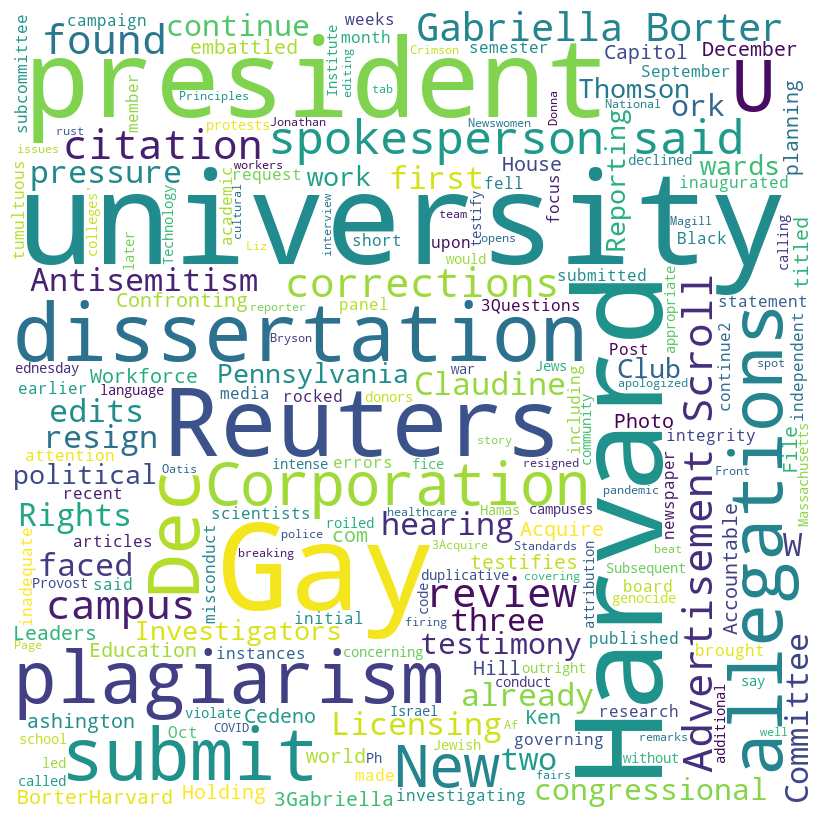

Word Cloud For Fox New's Article


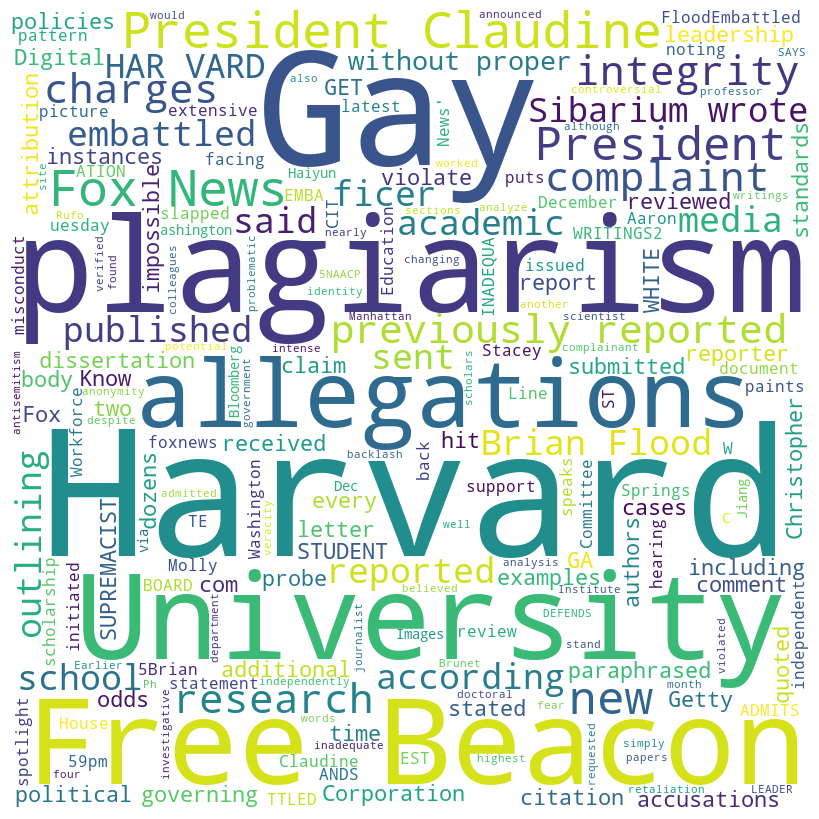

In [28]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='White', 
                stopwords = set(nltk.corpus.stopwords.words('english')),
                min_font_size = 10).generate(text)
    
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
  
    plt.show()

print("Word Cloud For Reuter's Article")
generate_wordcloud(text1)
print("Word Cloud For Fox New's Article")
generate_wordcloud(text2)